<a href="https://colab.research.google.com/github/KrankVegan/Encuesta-Cafe/blob/main/proyecto_encuesta_cafe_grupo_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Estudiante Talento Tech
Miguel A Martinez C

## Descripción de la base de datos

La base de datos utilizada corresponde a una **encuesta aplicada a consumidores de café en Colombia**, con un total de **1.000 registros**. Contiene variables tanto **categóricas** como **numéricas**, que incluyen información sobre:
- Hábitos de consumo de café.
- Preferencias de calidad.
- Frecuencia de compra.
- Características sociodemográficas de los encuestados.

Su estructura permite analizar patrones de comportamiento y factores asociados a las decisiones de compra de los consumidores.

---

## Importancia de la base de datos

Esta base de datos es valiosa porque:
- Ofrece una visión directa del **comportamiento del consumidor colombiano de café**.
- Permite estudiar **factores que influyen en la disposición a pagar más** por un producto nacional.
- Facilita la construcción de **modelos predictivos** para identificar perfiles de consumidores más propensos a valorar y pagar por un café de mayor calidad.
- Proporciona insumos para **estrategias de marketing, segmentación de mercado y toma de decisiones empresariales** en el sector cafetero.

---

## Elección de la variable objetivo

La variable objetivo seleccionada es:

**`DISPOSICION_A_PAGAR_MAS_POR_CAFE_DE_COLOMBIA`**  
(categorizada en "Sí" o "No" A.K.A Variable booleana)

Se eligió porque:
- Representa una **decisión clara de compra** y un indicador directo de la percepción de valor hacia el café colombiano.
- Está directamente relacionada con el **objetivo empresarial** de aumentar ingresos mediante estrategias de diferenciación de calidad.
- Permite identificar qué características del consumidor más influyen en la disposición a pagar, aportando valor tanto comercial como académico.

Link de donde se encontró esta base de datos: [Encuesta Café](https://www.kaggle.com/datasets/andrespabon21/encuesta-del-producto-cafe-realizada-en-colombia/data)


# Autenticador Drive

In [ ]:
# @title Conexión con la base de datos desde una URL
# URL: https://drive.google.com/file/d/1D1db7jNTR9TyZ9k2kWEz6_Qx55I8AgVP/view?usp=drive_link
# Definir el ID del archivo de Google Drive
FILEID = '1D1db7jNTR9TyZ9k2kWEz6_Qx55I8AgVP'
nombre_archivo = 'Encuesta_cafe.csv'

# Descargar el archivo desde Google Drive
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O $nombre_archivo && rm -rf /tmp/cookies.txt


--2025-08-20 15:52:32--  https://docs.google.com/uc?export=download&confirm=&id=1GeRlCQJqHQgkA170ueQx5CJ4ubLrO4xJ
Resolving docs.google.com (docs.google.com)... 173.194.215.113, 173.194.215.102, 173.194.215.100, ...
Connecting to docs.google.com (docs.google.com)|173.194.215.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1GeRlCQJqHQgkA170ueQx5CJ4ubLrO4xJ&export=download [following]
--2025-08-20 15:52:32--  https://drive.usercontent.google.com/download?id=1GeRlCQJqHQgkA170ueQx5CJ4ubLrO4xJ&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.215.132, 2607:f8b0:400c:c0c::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.215.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 291634 (285K) [application/octet-stream]
Saving to: ‘Encuesta_cafe.csv’

Encuesta_cafe.csv   100%[===================>] 284.8

#Librerias

In [ ]:
# @title Instalar libreria
%pip install numpy
%pip install sweetviz
%pip install category_encoders
%pip install unidecode
%pip install rdt
%pip install lazypredict
%pip install pandas
%pip install missingno

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 100.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.2/74.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 75.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 703.4/703.

In [ ]:
# importar librerias y modulos a utilizar
import os
import re
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import sweetviz as sw
import category_encoders as ce
from google.colab import files
import pandas as pd
import unidecode

#ML-Preproceso y Metricas

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.compose import ColumnTransformer

from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.decomposition import PCA
import xgboost as xgb


#Balanceo
from imblearn.under_sampling import CondensedNearestNeighbour, EditedNearestNeighbours, InstanceHardnessThreshold, RepeatedEditedNearestNeighbours, OneSidedSelection
from imblearn.under_sampling import TomekLinks
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import NearMiss

#Modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Funciones

In [ ]:
# @title Cargamos las funciones relacionadas
# Función para analizar la base de datos que devuelve cantidad de registros, valores únicos, total de vacíos, porcentaje de valores faltantes
def analizar_columnas(df):
  """
  Analiza las columnas de un DataFrame y devuelve información estadística, incluyendo el tipo de dato.

  Parámetros:
  df (DataFrame): El DataFrame a analizar.

  Retorno:
  Un DataFrame con la información estadística de cada columna.

  Ejemplo:
  df_analizado = analizar_columnas(df)
  print(df_analizado)
  """
  info = []
  for columna in df.columns:
    unicos = df[columna].nunique()
    nulos = df[columna].isnull().sum()
    total = len(df)
    porcentaje_nulos = (nulos / total) * 100
    dtype = df[columna].dtype # Get the data type
    info.append({
      'Columna': columna,
      'Cantidad de registros': total,
      'Únicos': unicos,
      'Cantidad de nulos': nulos,
      'Porcentaje de nulos': porcentaje_nulos,
      'Registros relacionados con nulos': total - nulos,
      'Tipo de dato': dtype # Add the data type to the dictionary
    })
  return pd.DataFrame(info)

# Ruta de datos

# Base de datos

In [ ]:
# Cargar datos
bbdd = pd.read_csv('Encuesta_cafe.csv')

# Vista previa
bbdd.head()

,Edad,Género,Nivel de ingresos mensuales,Frecuencia de consumo de café,Tipo de café preferido,Factor importante al elegir café,Calificación de calidad del café de Colombia,Característica asociada con el café de Colombia,Disposición a pagar más por café de Colombia,Rango de precios dispuesto a pagar,...,Recompra de Calidad,Factores de Calidad,Variación de Calidad,Precio de la Primera Compra,Precio de Recompra,Disposición a Pagar Más en la Recompra,Recomendación Social,Importancia Social,Discusiones Sociales,Influencia Social en la Compra
0,18-24 años,Masculino,Menos de $1000000 COP,Diariamente,Espresso,Aroma,4,Alta calidad,No,$10000 - $14000 COP,...,Mejor,Consistencia,Sí,$20000 - $24000 COP,$25000 COP o más,No,Sí,Muy importante,No,No
1,65 años o más,Masculino,$5000000 COP o más,Nunca,Café filtrado,Marca,5,Buena relación calidad-precio,Sí,Menos de $10000 COP,...,Igual,Sabor,No,$10000 - $14000 COP,$10000 - $14000 COP,Sí,No,Muy importante,No,Sí
2,65 años o más,Masculino,$5000000 COP o más,Varias veces al mes,Café descafeinado,Método de preparación,4,Aroma fuerte,Sí,$10000 - $14000 COP,...,Igual,Consistencia,Sí,$20000 - $24000 COP,$10000 - $14000 COP,No,Sí,Extremadamente importante,No,No
3,65 años o más,Masculino,$5000000 COP o más,Nunca,Café instantáneo,Precio,1,Buena relación calidad-precio,Sí,$10000 - $14000 COP,...,Mucho mejor,Consistencia,Sí,$20000 - $24000 COP,$20000 - $24000 COP,No,Sí,Moderadamente importante,Sí,Sí
4,35-44 años,Femenino,$5000000 COP o más,Varias veces al mes,Café filtrado,Sabor,1,Sabor suave,Sí,Menos de $10000 COP,...,Peor,Sabor,Sí,Menos de $10000 COP,Menos de $10000 COP,Sí,No,Moderadamente importante,No,Sí


In [ ]:
bbdd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   Edad                                                                 1000 non-null   object
 1   Género                                                               1000 non-null   object
 2   Nivel de ingresos mensuales                                          1000 non-null   object
 3   Frecuencia de consumo de café                                        1000 non-null   object
 4   Tipo de café preferido                                               1000 non-null   object
 5   Factor importante al elegir café                                     1000 non-null   object
 6   Calificación de calidad del café de Colombia                         1000 non-null   int64 
 7   Característica a

In [ ]:
analizar_columnas(bbdd)

,Columna,Cantidad de registros,Únicos,Cantidad de nulos,Porcentaje de nulos,Registros relacionados con nulos,Tipo de dato
0,Edad,1000,7,0,0.0,1000,object
1,Género,1000,2,0,0.0,1000,object
2,Nivel de ingresos mensuales,1000,4,0,0.0,1000,object
3,Frecuencia de consumo de café,1000,6,0,0.0,1000,object
4,Tipo de café preferido,1000,5,0,0.0,1000,object
5,Factor importante al elegir café,1000,7,0,0.0,1000,object
6,Calificación de calidad del café de Colombia,1000,5,0,0.0,1000,int64
7,Característica asociada con el café de Colombia,1000,5,0,0.0,1000,object
8,Disposición a pagar más por café de Colombia,1000,2,0,0.0,1000,object
9,Rango de precios dispuesto a pagar,1000,5,0,0.0,1000,object


## Descripción de las Columnas de la Base de Datos Original

| Columna                                                               | Descripción                                                                      | Valores Únicos                                                                                                                               |
| :-------------------------------------------------------------------- | :------------------------------------------------------------------------------- | :------------------------------------------------------------------------------------------------------------------------------------------- |
| `Edad`                                                                | Rango de edad del encuestado.                                                  | 18-24 años, 65 años o más, 35-44 años, 25-34 años, 45-54 años, 55-64 años, Menos de 18 años |
| `Género`                                                              | Género del encuestado.                                                         | Masculino, Femenino                                                                                                                          |
| `Nivel de ingresos mensuales`                                         | Nivel de ingresos mensuales del encuestado en pesos colombianos (COP).         | Menos de $1000000 COP, $5000000 COP o más, $2000000 - $3000000 COP, $1000000 - $2000000 COP, $3000000 - $4000000 COP, $4000000 - $5000000 COP |
| `Frecuencia de consumo de café`                                       | Con qué frecuencia el encuestado consume café.                                   | Diariamente, Nunca, Varias veces al mes, Una vez a la semana, Varias veces a la semana, Una vez al mes |
| `Tipo de café preferido`                                              | Tipo de café que prefiere el encuestado (Espresso, filtrado, instantáneo, etc.). | Espresso, Café filtrado, Café descafeinado, Café instantáneo, Café en grano entero |
| `Factor importante al elegir café`                                    | Principal factor que influye en la elección de café (sabor, precio, marca, etc.). | Aroma, Marca, Método de preparación, Precio, Sabor, Origen (región), Tipo de grano |
| `Calificación de calidad del café de Colombia`                        | Calificación de la calidad del café colombiano por parte del encuestado.         | 4, 5, 1, 2, 3                                                                                                                                |
| `Característica asociada con el café de Colombia`                     | Característica principal que el encuestado asocia con el café colombiano.      | Alta calidad, Buena relación calidad-precio, Aroma fuerte, Sabor suave, Producción sostenible |
| `Disposición a pagar más por café de Colombia`                        | Indica si el encuestado está dispuesto a pagar más por café colombiano ("Sí" o "No"). | No, Sí                                                                                                                                       |
| `Rango de precios dispuesto a pagar`                                  | Rango de precios que el encuestado está dispuesto a pagar por café.            | $10000 - $14000 COP, Menos de $10000 COP, $15000 - $20000 COP, $20000 - $24000 COP, $25000 COP o más |
| `Continuar comprando si el precio aumenta 10%`                        | Indica si el encuestado seguiría comprando si el precio aumenta un 10%.        | No, Sí, No estoy seguro                                                                                                                      |
| `Probabilidad de cambiar de marca si encuentra una opción más barata` | Probabilidad de cambiar de marca si encuentra una opción más económica.        | Baja, Muy baja, Moderada, Alta, Muy alta                                                                                                     |
| `Recuerdo de Marketing`                                               | Información relacionada con el recuerdo de actividades de marketing. | Sí, No                                                                                                                            |
| `Influencia del Marketing`                                            | Nivel de influencia del marketing en la decisión de compra del encuestado.     | Ninguna, Muy baja, Moderada, Alta, Muy alta                                                                                                  |
| `Canales de Marketing`                                                | Canales de marketing que más influyen en el encuestado.                        | Redes sociales, TV, Prensa escrita, Radio |
| `Percepción de la Calidad del Marketing`                              | Percepción del encuestado sobre la calidad del marketing del café.             | No, Sí                                                                                                                                       |
| `Recompra de Calidad`                                                 | Comparación de la calidad percibida en la recompra respecto a la primera compra. | Mejor, Igual, Mucho mejor, Peor, Mucho peor                                                                                                  |
| `Factores de Calidad`                                                 | Factores de calidad más importantes para el encuestado.                        | Consistencia, Sabor, Aroma, Precio, Origen |
| `Variación de Calidad`                                                | Si el encuestado percibe variación en la calidad del café.                     | Sí, No                                                                                                                                       |
| `Precio de la Primera Compra`                                         | Rango de precio pagado en la primera compra.                                   | $20000 - $24000 COP, $10000 - $14000 COP, Menos de $10000 COP, $15000 - $20000 COP, $25000 COP o más |
| `Precio de Recompra`                                                  | Rango de precio pagado en la recompra.                                         | $25000 COP o más, $10000 - $14000 COP, $20000 - $24000 COP, Menos de $10000 COP, $15000 - $20000 COP |
| `Disposición a Pagar Más en la Recompra`                              | Indica si el encuestado está dispuesto a pagar más en la recompra.           | No, Sí                                                                                                                                       |
| `Recomendación Social`                                                | Si el encuestado recomienda el café a otros.                                   | Sí, No                                                                                                                                       |
| `Importancia Social`                                                  | Importancia de la opinión social en la decisión de compra de café.           | Muy importante, Extremadamente importante, Moderadamente importante, Poco importante, Nada importante |
| `Discusiones Sociales`                                                | Si el encuestado participa en discusiones sobre café.                          | No, Sí                                                                                                                                       |
| `Influencia Social en la Compra`                                      | Influencia de las redes sociales en la compra de café.                           | No, Sí                                                                                                                                       |

# Limpieza de datos

La columna 'Recuerdo de Marketing' fue eliminada del conjunto de datos. Esta decisión se tomó debido a que la descripción de la base de datos original no proporciona una explicación clara sobre qué tipo de información contiene esta columna. Sin una comprensión adecuada de su significado, no es posible determinar su relevancia para el análisis o cómo preprocesarla correctamente. Por lo tanto, para evitar introducir ruido o sesgos en el modelo, se optó por dropearla.

In [ ]:
#@title Dropear Columna que no esta bien descrita
bbdd = bbdd.drop(columns=['Recuerdo de Marketing'])

In [ ]:
# @title Manejo de nombre Columnas
# Quitar tildes, espacios y todo a mayusuculas para nombres de las columnas
# Normalizar los nombres de las columnas
bbdd.columns = [unidecode.unidecode(col.upper().replace(' ', '_')) for col in bbdd.columns]

# Mostrar las columnas renombradas
print(bbdd.columns)

Index(['EDAD', 'GENERO', 'NIVEL_DE_INGRESOS_MENSUALES',
       'FRECUENCIA_DE_CONSUMO_DE_CAFE', 'TIPO_DE_CAFE_PREFERIDO',
       'FACTOR_IMPORTANTE_AL_ELEGIR_CAFE',
       'CALIFICACION_DE_CALIDAD_DEL_CAFE_DE_COLOMBIA',
       'CARACTERISTICA_ASOCIADA_CON_EL_CAFE_DE_COLOMBIA',
       'DISPOSICION_A_PAGAR_MAS_POR_CAFE_DE_COLOMBIA',
       'RANGO_DE_PRECIOS_DISPUESTO_A_PAGAR',
       'CONTINUAR_COMPRANDO_SI_EL_PRECIO_AUMENTA_10%',
       'PROBABILIDAD_DE_CAMBIAR_DE_MARCA_SI_ENCUENTRA_UNA_OPCION_MAS_BARATA',
       'INFLUENCIA_DEL_MARKETING', 'CANALES_DE_MARKETING',
       'PERCEPCION_DE_LA_CALIDAD_DEL_MARKETING', 'RECOMPRA_DE_CALIDAD',
       'FACTORES_DE_CALIDAD', 'VARIACION_DE_CALIDAD',
       'PRECIO_DE_LA_PRIMERA_COMPRA', 'PRECIO_DE_RECOMPRA',
       'DISPOSICION_A_PAGAR_MAS_EN_LA_RECOMPRA', 'RECOMENDACION_SOCIAL',
       'IMPORTANCIA_SOCIAL', 'DISCUSIONES_SOCIALES',
       'INFLUENCIA_SOCIAL_EN_LA_COMPRA'],
      dtype='object')


## Codificacion de variables categoricas

**Aplicar LabelEncoder para columnas categoricas de caracter ordinal/booleanas y Aplicar OneHotEncoder para columnas categoricas de caracter nominal**



In [ ]:
# Crear una copia
df_model = bbdd.copy()

In [ ]:
# ===== 1️⃣ Variables =====
ordinal_bool_vars = [
    'EDAD',
    'GENERO',
    'NIVEL_DE_INGRESOS_MENSUALES',
    'FRECUENCIA_DE_CONSUMO_DE_CAFE',
    'RANGO_DE_PRECIOS_DISPUESTO_A_PAGAR',
    'PROBABILIDAD_DE_CAMBIAR_DE_MARCA_SI_ENCUENTRA_UNA_OPCION_MAS_BARATA',
    'INFLUENCIA_DEL_MARKETING',
    'RECOMPRA_DE_CALIDAD',
    'IMPORTANCIA_SOCIAL',
    'DISPOSICION_A_PAGAR_MAS_POR_CAFE_DE_COLOMBIA',
    'CONTINUAR_COMPRANDO_SI_EL_PRECIO_AUMENTA_10%',
    'VARIACION_DE_CALIDAD',
    'DISPOSICION_A_PAGAR_MAS_EN_LA_RECOMPRA',
    'RECOMENDACION_SOCIAL',
    'DISCUSIONES_SOCIALES',
    'INFLUENCIA_SOCIAL_EN_LA_COMPRA'
]

nominal_vars = [
    'TIPO_DE_CAFE_PREFERIDO',
    'FACTOR_IMPORTANTE_AL_ELEGIR_CAFE',
    'CARACTERISTICA_ASOCIADA_CON_EL_CAFE_DE_COLOMBIA',
    'CANALES_DE_MARKETING',
    'PERCEPCION_DE_LA_CALIDAD_DEL_MARKETING',
    'FACTORES_DE_CALIDAD',
    'PRECIO_DE_LA_PRIMERA_COMPRA',
    'PRECIO_DE_RECOMPRA'
]

# ===== 2️⃣ LabelEncoder para variables ordinales =====
le = LabelEncoder()
for col in ordinal_bool_vars:
    df_model[col] = le.fit_transform(df_model[col])

# ===== 3️⃣ OneHotEncoder para variables nominales =====
ohe = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' evita multicolinealidad
ohe_df = pd.DataFrame(
    ohe.fit_transform(df_model[nominal_vars]),
    columns=ohe.get_feature_names_out(nominal_vars),
    index=df_model.index
)

# ===== 4️⃣ Combinar DataFrame =====
df_model_encoded = pd.concat([df_model.drop(columns=nominal_vars), ohe_df], axis=1)

# ===== 5️⃣ Ver resultado =====
print("Forma final del DataFrame:", df_model_encoded.shape)
df_model_encoded.head()

Forma final del DataFrame: (1000, 47)


,EDAD,GENERO,NIVEL_DE_INGRESOS_MENSUALES,FRECUENCIA_DE_CONSUMO_DE_CAFE,CALIFICACION_DE_CALIDAD_DEL_CAFE_DE_COLOMBIA,DISPOSICION_A_PAGAR_MAS_POR_CAFE_DE_COLOMBIA,RANGO_DE_PRECIOS_DISPUESTO_A_PAGAR,CONTINUAR_COMPRANDO_SI_EL_PRECIO_AUMENTA_10%,PROBABILIDAD_DE_CAMBIAR_DE_MARCA_SI_ENCUENTRA_UNA_OPCION_MAS_BARATA,INFLUENCIA_DEL_MARKETING,...,FACTORES_DE_CALIDAD_Precio,FACTORES_DE_CALIDAD_Sabor,PRECIO_DE_LA_PRIMERA_COMPRA_$15000 - $20000 COP,PRECIO_DE_LA_PRIMERA_COMPRA_$20000 - $24000 COP,PRECIO_DE_LA_PRIMERA_COMPRA_$25000 COP o más,PRECIO_DE_LA_PRIMERA_COMPRA_Menos de $10000 COP,PRECIO_DE_RECOMPRA_$15000 - $20000 COP,PRECIO_DE_RECOMPRA_$20000 - $24000 COP,PRECIO_DE_RECOMPRA_$25000 COP o más,PRECIO_DE_RECOMPRA_Menos de $10000 COP
0,0,1,3,0,4,0,0,1,4,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,5,1,2,1,5,1,4,2,1,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,1,2,5,4,1,0,2,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,1,2,1,1,1,0,2,1,4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2,0,2,5,1,1,4,2,1,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
df_model_encoded.head()

,EDAD,GENERO,NIVEL_DE_INGRESOS_MENSUALES,FRECUENCIA_DE_CONSUMO_DE_CAFE,CALIFICACION_DE_CALIDAD_DEL_CAFE_DE_COLOMBIA,DISPOSICION_A_PAGAR_MAS_POR_CAFE_DE_COLOMBIA,RANGO_DE_PRECIOS_DISPUESTO_A_PAGAR,CONTINUAR_COMPRANDO_SI_EL_PRECIO_AUMENTA_10%,PROBABILIDAD_DE_CAMBIAR_DE_MARCA_SI_ENCUENTRA_UNA_OPCION_MAS_BARATA,INFLUENCIA_DEL_MARKETING,...,FACTORES_DE_CALIDAD_Precio,FACTORES_DE_CALIDAD_Sabor,PRECIO_DE_LA_PRIMERA_COMPRA_$15000 - $20000 COP,PRECIO_DE_LA_PRIMERA_COMPRA_$20000 - $24000 COP,PRECIO_DE_LA_PRIMERA_COMPRA_$25000 COP o más,PRECIO_DE_LA_PRIMERA_COMPRA_Menos de $10000 COP,PRECIO_DE_RECOMPRA_$15000 - $20000 COP,PRECIO_DE_RECOMPRA_$20000 - $24000 COP,PRECIO_DE_RECOMPRA_$25000 COP o más,PRECIO_DE_RECOMPRA_Menos de $10000 COP
0,0,1,3,0,4,0,0,1,4,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,5,1,2,1,5,1,4,2,1,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,1,2,5,4,1,0,2,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,1,2,1,1,1,0,2,1,4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2,0,2,5,1,1,4,2,1,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
# @title Verificar la forma de los datos
print(f"Forma de los datos (filas, columnas): {df_model_encoded.shape}")

Forma de los datos (filas, columnas): (1000, 47)


In [ ]:
# @title Verificar los tipos de datos de cada columna
print("\nTipos de datos por columna:")
print(df_model_encoded.dtypes)


Tipos de datos por columna:
EDAD                                                                               int64
GENERO                                                                             int64
NIVEL_DE_INGRESOS_MENSUALES                                                        int64
FRECUENCIA_DE_CONSUMO_DE_CAFE                                                      int64
CALIFICACION_DE_CALIDAD_DEL_CAFE_DE_COLOMBIA                                       int64
DISPOSICION_A_PAGAR_MAS_POR_CAFE_DE_COLOMBIA                                       int64
RANGO_DE_PRECIOS_DISPUESTO_A_PAGAR                                                 int64
CONTINUAR_COMPRANDO_SI_EL_PRECIO_AUMENTA_10%                                       int64
PROBABILIDAD_DE_CAMBIAR_DE_MARCA_SI_ENCUENTRA_UNA_OPCION_MAS_BARATA                int64
INFLUENCIA_DEL_MARKETING                                                           int64
RECOMPRA_DE_CALIDAD                                                              

In [ ]:
# Print the columns of the encoded DataFrame
print("Columns in df_model_encoded:")
print(df_model_encoded.columns)

# Print the info of the encoded DataFrame again
print("\nInfo of df_model_encoded:")
df_model_encoded.info()

Columns in df_model_encoded:
Index(['EDAD', 'GENERO', 'NIVEL_DE_INGRESOS_MENSUALES',
       'FRECUENCIA_DE_CONSUMO_DE_CAFE',
       'CALIFICACION_DE_CALIDAD_DEL_CAFE_DE_COLOMBIA',
       'DISPOSICION_A_PAGAR_MAS_POR_CAFE_DE_COLOMBIA',
       'RANGO_DE_PRECIOS_DISPUESTO_A_PAGAR',
       'CONTINUAR_COMPRANDO_SI_EL_PRECIO_AUMENTA_10%',
       'PROBABILIDAD_DE_CAMBIAR_DE_MARCA_SI_ENCUENTRA_UNA_OPCION_MAS_BARATA',
       'INFLUENCIA_DEL_MARKETING', 'RECOMPRA_DE_CALIDAD',
       'VARIACION_DE_CALIDAD', 'DISPOSICION_A_PAGAR_MAS_EN_LA_RECOMPRA',
       'RECOMENDACION_SOCIAL', 'IMPORTANCIA_SOCIAL', 'DISCUSIONES_SOCIALES',
       'INFLUENCIA_SOCIAL_EN_LA_COMPRA',
       'TIPO_DE_CAFE_PREFERIDO_Café descafeinado',
       'TIPO_DE_CAFE_PREFERIDO_Café filtrado',
       'TIPO_DE_CAFE_PREFERIDO_Café instantáneo',
       'TIPO_DE_CAFE_PREFERIDO_Espresso',
       'FACTOR_IMPORTANTE_AL_ELEGIR_CAFE_Marca',
       'FACTOR_IMPORTANTE_AL_ELEGIR_CAFE_Método de preparación',
       'FACTOR_IMPORTANTE_AL_ELEGI

In [ ]:
#@title Comparacion heads de base de datos original y codificada
print("Base de datos original:")
bbdd.head()

Base de datos original:


,EDAD,GENERO,NIVEL_DE_INGRESOS_MENSUALES,FRECUENCIA_DE_CONSUMO_DE_CAFE,TIPO_DE_CAFE_PREFERIDO,FACTOR_IMPORTANTE_AL_ELEGIR_CAFE,CALIFICACION_DE_CALIDAD_DEL_CAFE_DE_COLOMBIA,CARACTERISTICA_ASOCIADA_CON_EL_CAFE_DE_COLOMBIA,DISPOSICION_A_PAGAR_MAS_POR_CAFE_DE_COLOMBIA,RANGO_DE_PRECIOS_DISPUESTO_A_PAGAR,...,RECOMPRA_DE_CALIDAD,FACTORES_DE_CALIDAD,VARIACION_DE_CALIDAD,PRECIO_DE_LA_PRIMERA_COMPRA,PRECIO_DE_RECOMPRA,DISPOSICION_A_PAGAR_MAS_EN_LA_RECOMPRA,RECOMENDACION_SOCIAL,IMPORTANCIA_SOCIAL,DISCUSIONES_SOCIALES,INFLUENCIA_SOCIAL_EN_LA_COMPRA
0,18-24 años,Masculino,Menos de $1000000 COP,Diariamente,Espresso,Aroma,4,Alta calidad,No,$10000 - $14000 COP,...,Mejor,Consistencia,Sí,$20000 - $24000 COP,$25000 COP o más,No,Sí,Muy importante,No,No
1,65 años o más,Masculino,$5000000 COP o más,Nunca,Café filtrado,Marca,5,Buena relación calidad-precio,Sí,Menos de $10000 COP,...,Igual,Sabor,No,$10000 - $14000 COP,$10000 - $14000 COP,Sí,No,Muy importante,No,Sí
2,65 años o más,Masculino,$5000000 COP o más,Varias veces al mes,Café descafeinado,Método de preparación,4,Aroma fuerte,Sí,$10000 - $14000 COP,...,Igual,Consistencia,Sí,$20000 - $24000 COP,$10000 - $14000 COP,No,Sí,Extremadamente importante,No,No
3,65 años o más,Masculino,$5000000 COP o más,Nunca,Café instantáneo,Precio,1,Buena relación calidad-precio,Sí,$10000 - $14000 COP,...,Mucho mejor,Consistencia,Sí,$20000 - $24000 COP,$20000 - $24000 COP,No,Sí,Moderadamente importante,Sí,Sí
4,35-44 años,Femenino,$5000000 COP o más,Varias veces al mes,Café filtrado,Sabor,1,Sabor suave,Sí,Menos de $10000 COP,...,Peor,Sabor,Sí,Menos de $10000 COP,Menos de $10000 COP,Sí,No,Moderadamente importante,No,Sí


In [ ]:
print("\n Base de datos codificada:")
df_model_encoded.head()


 Base de datos codificada:


,EDAD,GENERO,NIVEL_DE_INGRESOS_MENSUALES,FRECUENCIA_DE_CONSUMO_DE_CAFE,CALIFICACION_DE_CALIDAD_DEL_CAFE_DE_COLOMBIA,DISPOSICION_A_PAGAR_MAS_POR_CAFE_DE_COLOMBIA,RANGO_DE_PRECIOS_DISPUESTO_A_PAGAR,CONTINUAR_COMPRANDO_SI_EL_PRECIO_AUMENTA_10%,PROBABILIDAD_DE_CAMBIAR_DE_MARCA_SI_ENCUENTRA_UNA_OPCION_MAS_BARATA,INFLUENCIA_DEL_MARKETING,...,FACTORES_DE_CALIDAD_Precio,FACTORES_DE_CALIDAD_Sabor,PRECIO_DE_LA_PRIMERA_COMPRA_$15000 - $20000 COP,PRECIO_DE_LA_PRIMERA_COMPRA_$20000 - $24000 COP,PRECIO_DE_LA_PRIMERA_COMPRA_$25000 COP o más,PRECIO_DE_LA_PRIMERA_COMPRA_Menos de $10000 COP,PRECIO_DE_RECOMPRA_$15000 - $20000 COP,PRECIO_DE_RECOMPRA_$20000 - $24000 COP,PRECIO_DE_RECOMPRA_$25000 COP o más,PRECIO_DE_RECOMPRA_Menos de $10000 COP
0,0,1,3,0,4,0,0,1,4,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,5,1,2,1,5,1,4,2,1,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,1,2,5,4,1,0,2,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,1,2,1,1,1,0,2,1,4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2,0,2,5,1,1,4,2,1,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
#@title Contar los valores únicos por columna
print("\nValores únicos por columna:")
print(df_model_encoded.nunique())


Valores únicos por columna:
EDAD                                                                             7
GENERO                                                                           2
NIVEL_DE_INGRESOS_MENSUALES                                                      4
FRECUENCIA_DE_CONSUMO_DE_CAFE                                                    6
CALIFICACION_DE_CALIDAD_DEL_CAFE_DE_COLOMBIA                                     5
DISPOSICION_A_PAGAR_MAS_POR_CAFE_DE_COLOMBIA                                     2
RANGO_DE_PRECIOS_DISPUESTO_A_PAGAR                                               5
CONTINUAR_COMPRANDO_SI_EL_PRECIO_AUMENTA_10%                                     3
PROBABILIDAD_DE_CAMBIAR_DE_MARCA_SI_ENCUENTRA_UNA_OPCION_MAS_BARATA              5
INFLUENCIA_DEL_MARKETING                                                         5
RECOMPRA_DE_CALIDAD                                                              5
VARIACION_DE_CALIDAD                                      

In [ ]:
#@title Verificar si hay datos faltantes
print("\nDatos faltantes por columna:")
print(df_model_encoded.isnull().sum())


Datos faltantes por columna:
EDAD                                                                             0
GENERO                                                                           0
NIVEL_DE_INGRESOS_MENSUALES                                                      0
FRECUENCIA_DE_CONSUMO_DE_CAFE                                                    0
CALIFICACION_DE_CALIDAD_DEL_CAFE_DE_COLOMBIA                                     0
DISPOSICION_A_PAGAR_MAS_POR_CAFE_DE_COLOMBIA                                     0
RANGO_DE_PRECIOS_DISPUESTO_A_PAGAR                                               0
CONTINUAR_COMPRANDO_SI_EL_PRECIO_AUMENTA_10%                                     0
PROBABILIDAD_DE_CAMBIAR_DE_MARCA_SI_ENCUENTRA_UNA_OPCION_MAS_BARATA              0
INFLUENCIA_DEL_MARKETING                                                         0
RECOMPRA_DE_CALIDAD                                                              0
VARIACION_DE_CALIDAD                                     

# Análisis exploratorio de datos (EDA)

In [ ]:
#@title Base original
#Configurar las opciones de visualizacion Sweetviz
sw.config_parser.read_string("""
                              [Output_Defaults]
                              html_layout = widescreen
                              html_scale = 1.0
                              notebook_layout = widescreen
                              notebook_scale = 0.9
                              notebook_width = 100%
                              notebook_height = 700
                              [Layout]
                              show_logo = 0
                              """)
nombre = 'ANALISIS_ENCUESTA_BASE_DE_DATOS_CAFE'
advert_report = sw.analyze([bbdd, nombre]) # Realizamos el análisis de la base de datos inicial

#@markdown Guardar y mostrar reporte formato HTML
advert_report.show_html('EDA_Base_Datos_INicial.html')

#@markdown Descarga y abre el reporte en una nueva pestaña del navegador
almacenar_archivo = input('Alamcenar archivo Si o No: ').title()
if almacenar_archivo == 'Si':
  files.download('/content/EDA_Base_Datos_INicial.html')

                                             |          | [  0%]   00:00 -> (? left)

Report EDA_Base_Datos_INicial.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
Alamcenar archivo Si o No: no


In [ ]:
#@title Base codificada
#Configurar las opciones de visualizacion Sweetviz
sw.config_parser.read_string("""
                              [Output_Defaults]
                              html_layout = widescreen
                              html_scale = 1.0
                              notebook_layout = widescreen
                              notebook_scale = 0.9
                              notebook_width = 100%
                              notebook_height = 700
                              [Layout]
                              show_logo = 0
                              """)
nombre = 'ANALISIS_ENCUESTA_BASE_DE_DATOS_CAFE_CODIFICADO'
advert_report = sw.analyze([df_model_encoded, nombre]) # Realizamos el análisis de la base de datos inicial

#@markdown Guardar y mostrar reporte formato HTML
advert_report.show_html('EDA_Base_Datos_Codificada.html')

#@markdown Descarga y abre el reporte en una nueva pestaña del navegador
almacenar_archivo = input('Alamcenar archivo Si o No: ').title()
if almacenar_archivo == 'Si':
  files.download('/content/EDA_Base_Datos_Codificada.html')

                                             |          | [  0%]   00:00 -> (? left)

Report EDA_Base_Datos_Codificada.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
Alamcenar archivo Si o No: no


#Modelo

# Prueba Modelo

Antes de aplicar el modelo, debemos asegurarnos que en la base de datos para el entrenamiento no haya columnas muy correlacionadas con la variable objetivo, esto debido a que si lo hay, esto causaria que el modelo fuera muy reductivo u obvio.

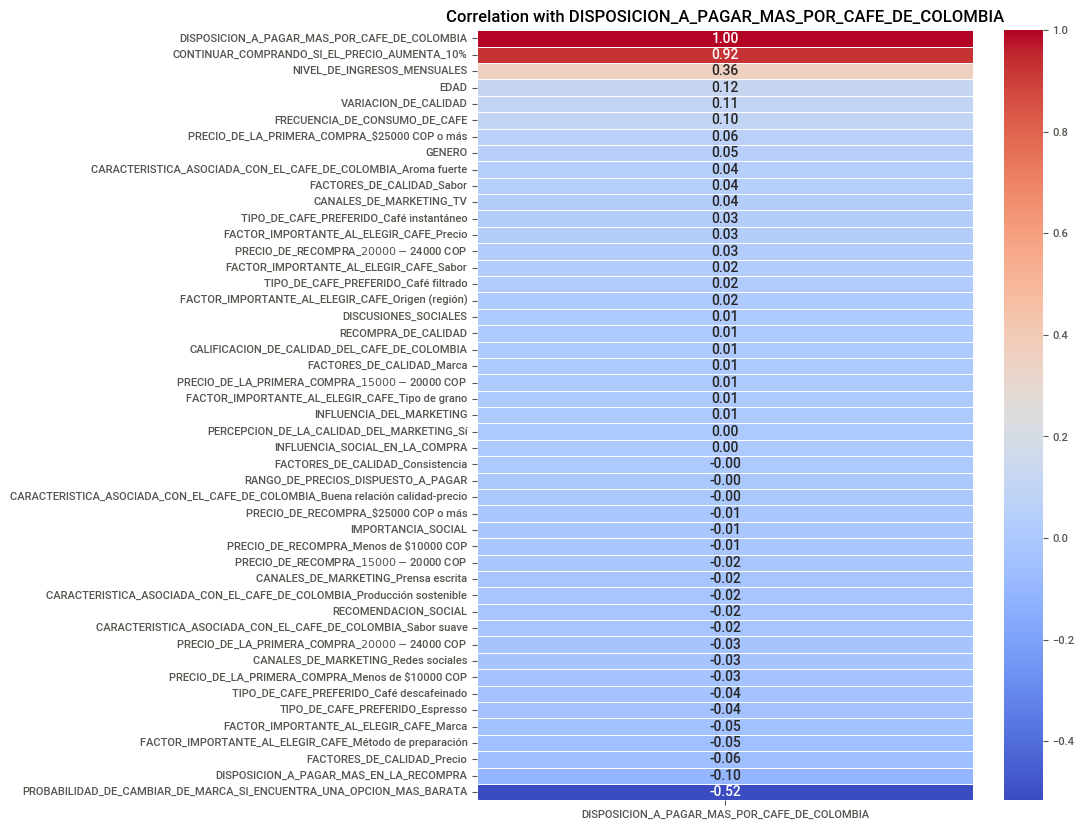

In [ ]:
#@title Encontrar columnas mas correlaciondas con variable objetivo
# Calculate the correlation matrix
correlation_matrix = df_model_encoded.corr()

# Select the correlations with the target variable
target_correlation = correlation_matrix[['DISPOSICION_A_PAGAR_MAS_POR_CAFE_DE_COLOMBIA']].sort_values(
    by='DISPOSICION_A_PAGAR_MAS_POR_CAFE_DE_COLOMBIA', ascending=False)

# Plot a heatmap of the target variable correlations
plt.figure(figsize=(8, 10))
sns.heatmap(target_correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation with DISPOSICION_A_PAGAR_MAS_POR_CAFE_DE_COLOMBIA')
plt.show()

In [ ]:
# Calcular matriz de correlacion
correlation_matrix = df_model_encoded.corr()

# Ver las correlaciones con la variable objetivo
target_correlation = correlation_matrix['DISPOSICION_A_PAGAR_MAS_POR_CAFE_DE_COLOMBIA']

# Eliminar la correlación de la variable objetivo consigo misma
target_correlation = target_correlation.drop('DISPOSICION_A_PAGAR_MAS_POR_CAFE_DE_COLOMBIA')

# Ordenar las correlaciones por valor absoluto en orden descendente
sorted_correlations = target_correlation.abs().sort_values(ascending=False)

# Obtener el top 10 variables mas correlaciondas
top_10_features = sorted_correlations.head(10)

print("Top 10 columnas mas correlacionadas con 'DISPOSICION_A_PAGAR_MAS_POR_CAFE_DE_COLOMBIA' (valor absoluto):")
print(top_10_features)

Top 10 columnas mas correlacionadas con 'DISPOSICION_A_PAGAR_MAS_POR_CAFE_DE_COLOMBIA' (valor absoluto):
CONTINUAR_COMPRANDO_SI_EL_PRECIO_AUMENTA_10%                           0.923394
PROBABILIDAD_DE_CAMBIAR_DE_MARCA_SI_ENCUENTRA_UNA_OPCION_MAS_BARATA    0.516557
NIVEL_DE_INGRESOS_MENSUALES                                            0.357609
EDAD                                                                   0.121428
VARIACION_DE_CALIDAD                                                   0.106855
DISPOSICION_A_PAGAR_MAS_EN_LA_RECOMPRA                                 0.104327
FRECUENCIA_DE_CONSUMO_DE_CAFE                                          0.104079
PRECIO_DE_LA_PRIMERA_COMPRA_$25000 COP o más                           0.060236
FACTORES_DE_CALIDAD_Precio                                             0.057691
FACTOR_IMPORTANTE_AL_ELEGIR_CAFE_Método de preparación                 0.050511
Name: DISPOSICION_A_PAGAR_MAS_POR_CAFE_DE_COLOMBIA, dtype: float64


Con lo anterior se puede observar que las columnas mas correlacionadas con nuestra variable objetivo "DISPOSICION_A_PAGAR_MAS_POR_CAFE_DE_COLOMBIA" son todas referentes a preguntas financieras y de ingresos de los encuestados, con lo cual se sugiere excluir esas columnas y enfocarnos en otros atributos como la edad, el genero, frencuencia de consumo, etc.

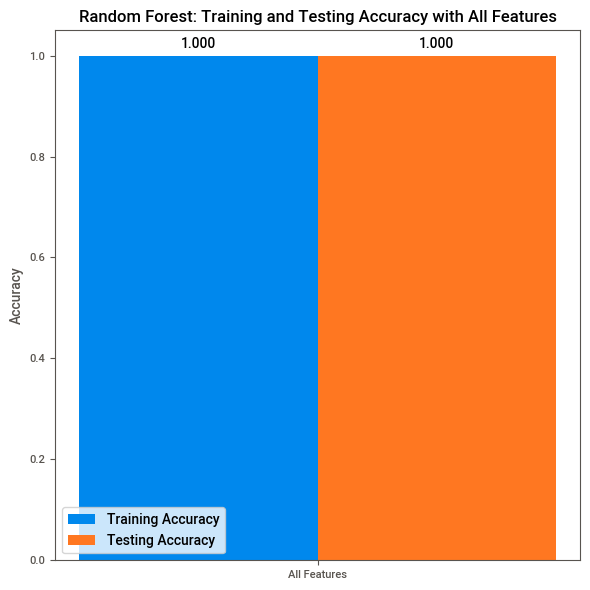

In [ ]:
#@title Caso tomando todas las columnas, mostrando overfitting

X_all = df_model_encoded.drop(columns=['DISPOSICION_A_PAGAR_MAS_POR_CAFE_DE_COLOMBIA'])
y = df_model_encoded['DISPOSICION_A_PAGAR_MAS_POR_CAFE_DE_COLOMBIA']

# Split data with all features
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest model with all features
rf_model_all = RandomForestClassifier(random_state=42)
rf_model_all.fit(X_train_all, y_train_all)

# Predict on the train and test sets for the model with all features
y_pred_all_train = rf_model_all.predict(X_train_all)
y_pred_all_test = rf_model_all.predict(X_test_all)

# Calculate accuracy for the model with all features
accuracy_all_train = accuracy_score(y_train_all, y_pred_all_train)
accuracy_all_test = accuracy_score(y_test_all, y_pred_all_test)

# Plotting the results
labels = ['All Features']
train_accuracy = [accuracy_all_train]
test_accuracy = [accuracy_all_test]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(6, 6)) # Adjusted figure size for a single bar group
rects1 = ax.bar(x - width/2, train_accuracy, width, label='Training Accuracy')
rects2 = ax.bar(x + width/2, test_accuracy, width, label='Testing Accuracy')

# Add some text for labels, title and axes ticks
ax.set_ylabel('Accuracy')
ax.set_title('Random Forest: Training and Testing Accuracy with All Features')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.3f' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

In [ ]:
# @title Division de entrenamiento y testeo, ya con reduccion de variables
# Define features (X) and the target variable (y) using the encoded DataFrame
# Drop the one-hot encoded target column from features X
X = df_model_encoded.drop(columns=['DISPOSICION_A_PAGAR_MAS_POR_CAFE_DE_COLOMBIA', 'CONTINUAR_COMPRANDO_SI_EL_PRECIO_AUMENTA_10%', 'PROBABILIDAD_DE_CAMBIAR_DE_MARCA_SI_ENCUENTRA_UNA_OPCION_MAS_BARATA', 'NIVEL_DE_INGRESOS_MENSUALES'])
# Select the one-hot encoded target column as the target variable y
y = df_model_encoded['DISPOSICION_A_PAGAR_MAS_POR_CAFE_DE_COLOMBIA']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Entrenamiento: {X_train.shape}, Prueba: {X_test.shape}")
print(f"Entrenamiento: {y_train.shape}, Prueba: {y_test.shape}")

Entrenamiento: (800, 43), Prueba: (200, 43)
Entrenamiento: (800,), Prueba: (200,)


In [ ]:
# @title Utlizando LazyClassifier para probar varios modelos

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

#Training the models
models_lazy,predictions = clf.fit(X_train, X_test, y_train, y_test)

# Printing the output
models_lazy

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 524, number of negative: 276
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000922 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.655000 -> initscore=0.641091
[LightGBM] [Info] Start training from score 0.641091
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.88,0.85,0.85,0.87,0.11
LGBMClassifier,0.87,0.85,0.85,0.87,0.13
AdaBoostClassifier,0.89,0.85,0.85,0.88,0.24
RandomForestClassifier,0.88,0.85,0.85,0.88,0.26
DecisionTreeClassifier,0.85,0.84,0.84,0.85,0.07
BaggingClassifier,0.85,0.83,0.83,0.85,0.10
ExtraTreesClassifier,0.84,0.79,0.79,0.83,0.32
GaussianNB,0.69,0.66,0.66,0.69,0.03
QuadraticDiscriminantAnalysis,0.64,0.59,0.59,0.62,0.22


In [ ]:
# Descargar la tabla de modelos como CSV
csv_filename = 'lazyclassifier_models_performance.csv'
models_lazy.to_csv(csv_filename, index=True)

print(f"Tabla de rendimiento de modelos guardada como '{csv_filename}'")

# Proporcionar un enlace para descargar el archivo (útil en entornos como Google Colab)
try:
  files.download(csv_filename)
except:
  print("No se pudo descargar el archivo automáticamente. Puedes encontrarlo en el panel de archivos.")

Tabla de rendimiento de modelos guardada como 'lazyclassifier_models_performance.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

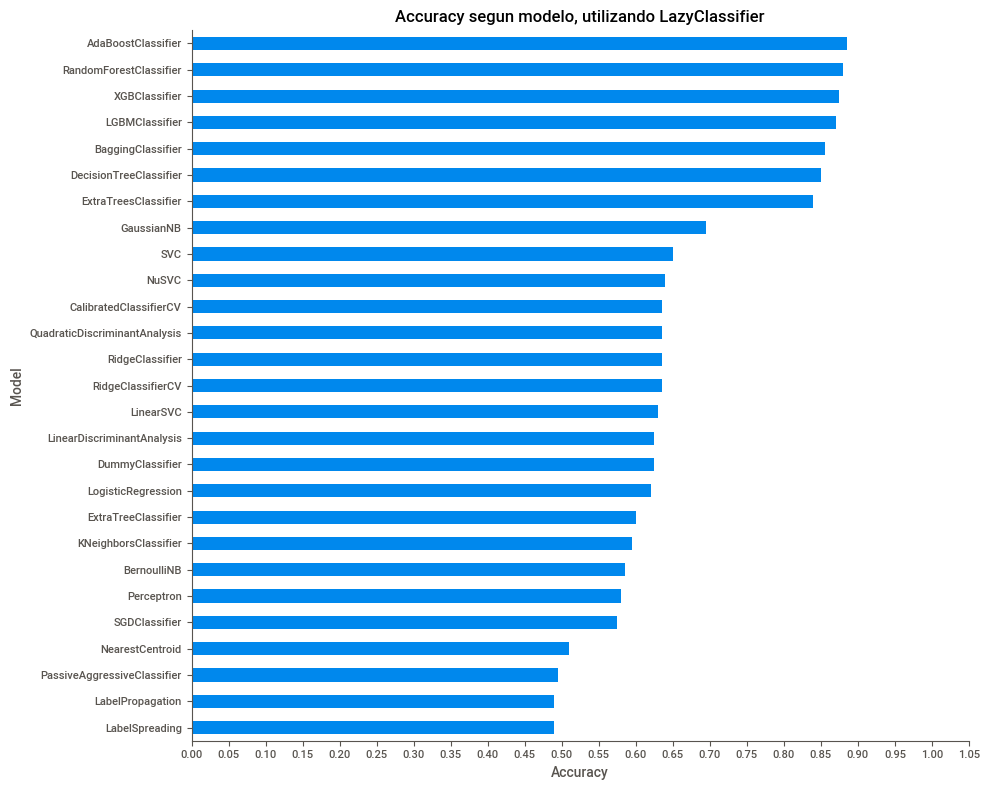

In [ ]:
from matplotlib import pyplot as plt
# Plot the accuracy of models using barh
models_lazy['Accuracy'].sort_values(ascending=True).plot(kind='barh', figsize=(10, 8), title='Accuracy segun modelo, utilizando LazyClassifier')
plt.gca().spines[['top', 'right']].set_visible(False)
# Adjust x-axis ticks for better readability with horizontal bars
plt.xticks(np.arange(0, 1.1, 0.05))
plt.ylabel('Model') # Swap labels for horizontal bar plot
plt.xlabel('Accuracy') # Swap labels for horizontal bar plot
plt.tight_layout() # Adjust layout to prevent labels from overlapping

In [ ]:
# @title aplicacion manual de modelos RandomForest y Arbol de decision

# Initialize and train Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print("\nMétricas de Árbol de Decisión:")
print(f"Accuracy: {accuracy_dt:.3f}")
print(f"F1-score (weighted): {f1_dt:.3f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_dt))

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=300, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("\nMétricas de Random Forest:")
print(f"Accuracy: {accuracy_rf:.3f}")
print(f"F1-score (weighted): {f1_rf:.3f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rf))


Métricas de Árbol de Decisión:
Accuracy: 0.885
F1-score (weighted): 0.880

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.98      0.71      0.82        75
           1       0.85      0.99      0.92       125

    accuracy                           0.89       200
   macro avg       0.92      0.85      0.87       200
weighted avg       0.90      0.89      0.88       200


Métricas de Random Forest:
Accuracy: 0.885
F1-score (weighted): 0.879

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.69      0.82        75
           1       0.84      1.00      0.92       125

    accuracy                           0.89       200
   macro avg       0.92      0.85      0.87       200
weighted avg       0.90      0.89      0.88       200



In [ ]:
# @title Aplicacion manual de escalado para LogisticRegression
# Apply Standard Scaling to the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and testing sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Entrenamiento (escalado): {X_train_scaled.shape}, Prueba (escalado): {X_test_scaled.shape}")
print(f"Entrenamiento: {y_train.shape}, Prueba: {y_test.shape}")

# Initialize and train Logistic Regression model on scaled data
log_reg_model_scaled = LogisticRegression(C=0.01, random_state=42)
log_reg_model_scaled.fit(X_train_scaled, y_train)

# Predict on the scaled test set
y_pred_log_reg_scaled = log_reg_model_scaled.predict(X_test_scaled)

# Evaluate the model
accuracy_log_reg_scaled = accuracy_score(y_test, y_pred_log_reg_scaled)
f1_log_reg_scaled = f1_score(y_test, y_pred_log_reg_scaled, average='weighted')

print("\nMétricas de Regresión Logística con Scaled Data:")
print(f"Accuracy: {accuracy_log_reg_scaled:.3f}")
print(f"F1-score (weighted): {f1_log_reg_scaled:.3f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_log_reg_scaled))

Entrenamiento (escalado): (800, 43), Prueba (escalado): (200, 43)
Entrenamiento: (800,), Prueba: (200,)

Métricas de Regresión Logística con Scaled Data:
Accuracy: 0.630
F1-score (weighted): 0.536

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.54      0.09      0.16        75
           1       0.64      0.95      0.76       125

    accuracy                           0.63       200
   macro avg       0.59      0.52      0.46       200
weighted avg       0.60      0.63      0.54       200



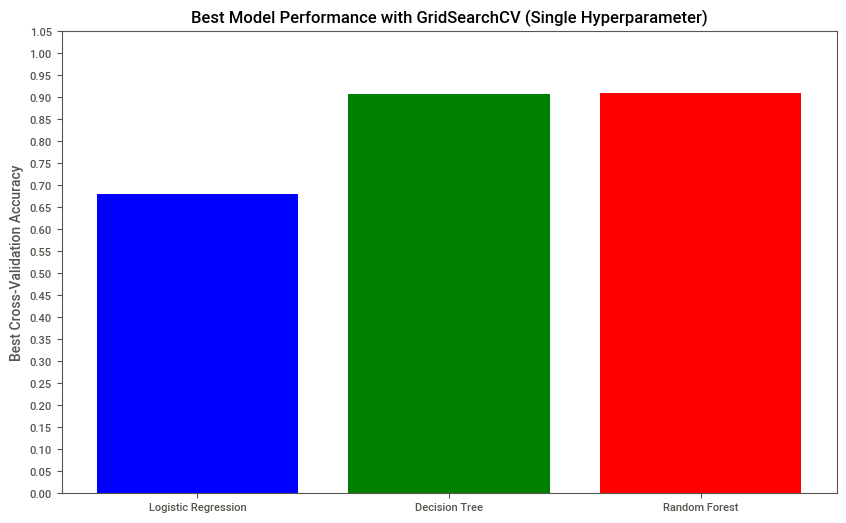

Best parameters for Logistic Regression: {'C': 0.01}

Best parameters for Decision Tree: {'max_depth': 5}

Best parameters for Random Forest: {'n_estimators': 200}


In [ ]:
# @title Aplicacion de GridSearchCV y comparacion grafica para los 3 modelos anteriores

# Define the models
log_reg = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Define the parameter grids for each model with only one hyperparameter
log_reg_params = {'C': [0.01, 1, 100]} # Regularization parameter

dt_params = {'max_depth': [5, 10, 15]} # Maximum depth of the tree

rf_params = {'n_estimators': [100, 200, 300]} # Number of trees in the forest


# Perform GridSearchCV for each model
grid_search_log_reg = GridSearchCV(log_reg, log_reg_params, cv=5, scoring='accuracy')
grid_search_log_reg.fit(X, y) # Using reduced features for LogReg

grid_search_dt = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy')
grid_search_dt.fit(X, y)

grid_search_rf = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy')
grid_search_rf.fit(X, y)

# Get the best scores from GridSearchCV
best_score_log_reg = grid_search_log_reg.best_score_
best_score_dt = grid_search_dt.best_score_
best_score_rf = grid_search_rf.best_score_

# Create a list of model names and their best scores
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
best_scores = [best_score_log_reg, best_score_dt, best_score_rf]

# Plot the best scores
plt.figure(figsize=(10, 6))
plt.bar(models, best_scores, color=['blue', 'green', 'red'])
plt.ylabel('Best Cross-Validation Accuracy')
plt.title('Best Model Performance with GridSearchCV (Single Hyperparameter)')
plt.ylim(0, 1) # Set y-axis limit from 0 to 1 for accuracy
plt.yticks(np.arange(0, 1.1, 0.05)) # Set custom y-axis ticks
plt.show()

print("Best parameters for Logistic Regression:", grid_search_log_reg.best_params_)


print("\nBest parameters for Decision Tree:", grid_search_dt.best_params_)


print("\nBest parameters for Random Forest:", grid_search_rf.best_params_)


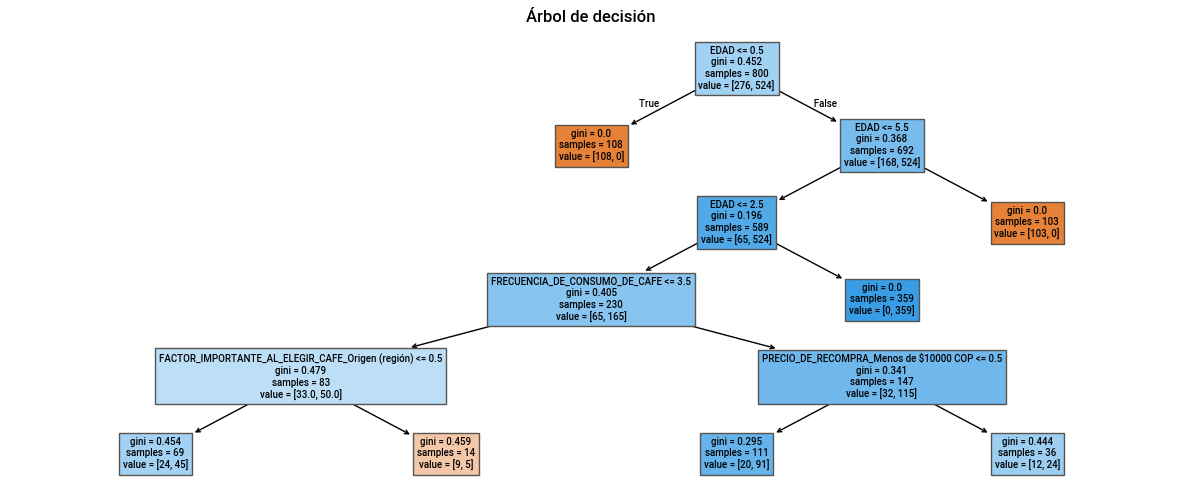

In [ ]:
# Visualizar árbol
plt.figure(figsize=(15, 6))
plot_tree(dt_model, feature_names=X_train.columns, filled=True)
plt.title("Árbol de decisión")
plt.show()

In [ ]:
# @title Tabla de comparacion entre Modelos de los 3 modelos
# Create a dictionary with the model names and their performance metrics
performance_data = {
    'Model': ['Logistic Regression (Scaled)', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_log_reg_scaled, accuracy_dt, accuracy_rf],
    'F1-score (weighted)': [f1_log_reg_scaled, f1_dt, f1_rf]
}

# Create a pandas DataFrame from the dictionary
performance_df = pd.DataFrame(performance_data)

# Display the performance table
print("Comparación de Rendimiento de Modelos:")
display(performance_df)

Comparación de Rendimiento de Modelos:


,Model,Accuracy,F1-score (weighted)
0,Logistic Regression (Scaled),0.63,0.54
1,Decision Tree,0.89,0.88
2,Random Forest,0.89,0.88


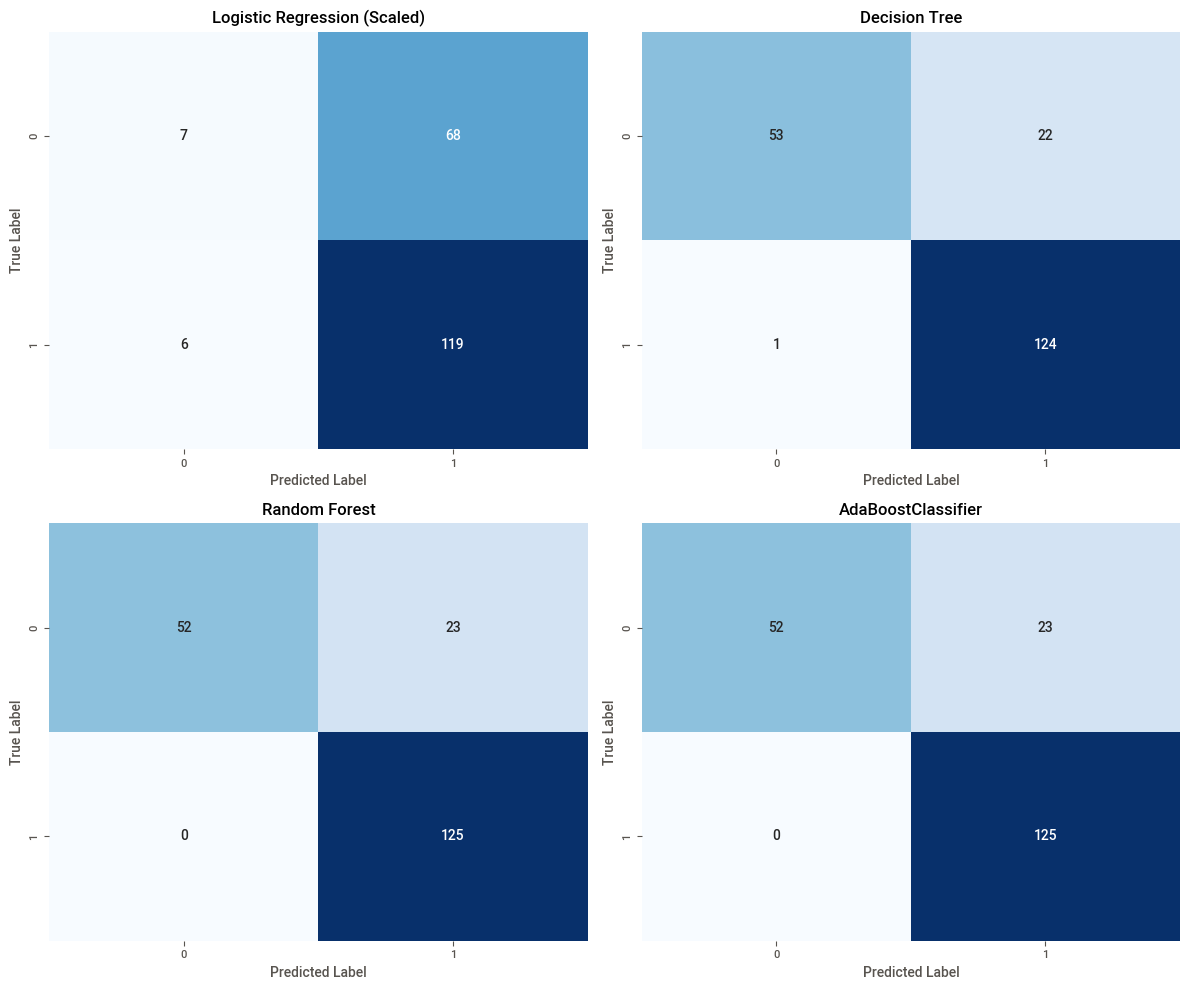

In [ ]:
#@title Matriz de confusiones del mejor modelo de LazyClassfier y los 3 modelos clasicos de clasificacion
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier

# Initialize and train AdaBoostClassifier (if not already trained)
# Assuming X_train and y_train are already defined and preprocessed appropriately
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)

# Get confusion matrices for the specified models
cm_log_reg_scaled = confusion_matrix(y_test, y_pred_log_reg_scaled) # Assuming y_pred_log_reg_scaled is available
cm_dt = confusion_matrix(y_test, y_pred_dt) # Assuming y_pred_dt is available
cm_rf = confusion_matrix(y_test, y_pred_rf) # Assuming y_pred_rf is available
cm_ada = confusion_matrix(y_test, y_pred_ada)


# Create a grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot Confusion Matrix for Logistic Regression (Scaled)
sns.heatmap(cm_log_reg_scaled, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0, 0])
axes[0, 0].set_title('Logistic Regression (Scaled)')
axes[0, 0].set_xlabel('Predicted Label')
axes[0, 0].set_ylabel('True Label')

# Plot Confusion Matrix for Decision Tree
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0, 1])
axes[0, 1].set_title('Decision Tree')
axes[0, 1].set_xlabel('Predicted Label')
axes[0, 1].set_ylabel('True Label')

# Plot Confusion Matrix for Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1, 0])
axes[1, 0].set_title('Random Forest')
axes[1, 0].set_xlabel('Predicted Label')
axes[1, 0].set_ylabel('True Label')

# Plot Confusion Matrix for AdaBoostClassifier
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1, 1])
axes[1, 1].set_title('AdaBoostClassifier')
axes[1, 1].set_xlabel('Predicted Label')
axes[1, 1].set_ylabel('True Label')


plt.tight_layout()
plt.show()

# Análisis y Conclusiones

# Análisis y Conclusiones - Top 5 Modelos

Tras evaluar varios modelos de clasificación con LazyClassifier y aplicando manualmente algunos modelos clásicos, hemos identificado los 5 con mejor rendimiento en este conjunto de datos para predecir la 'DISPOSICION_A_PAGAR_MAS_POR_CAFE_DE_COLOMBIA' basándonos en una combinación de **Accuracy**, **Recall** y **F1 Score**. Es importante considerar estas métricas en conjunto para tener una visión completa del rendimiento del modelo, especialmente en problemas de clasificación binaria donde el balance de clases puede ser un factor.

Considerando los resultados obtenidos, los modelos destacados son:

1.  **AdaBoostClassifier**: Este modelo mostró consistentemente un alto rendimiento en Accuracy, Recall y F1 Score. Su enfoque de ensamble, que se centra en corregir los errores de clasificadores débiles de manera iterativa, parece ser muy efectivo para capturar las relaciones en este conjunto de datos y manejar posibles desbalances en la variable objetivo.
2.  **RandomForestClassifier**: Este modelo de ensamble, que construye múltiples árboles de decisión y combina sus predicciones, también demostró un rendimiento sólido en las tres métricas clave. La aleatoriedad inherente en la construcción de los árboles ayuda a reducir la varianza y mejorar la generalización del modelo, lo que contribuye a su buen desempeño.
3.  **XGBClassifier**: Otro potente modelo de boosting de gradiente que se destacó por su precisión y F1 Score. Su capacidad para manejar estructuras de datos complejas y su optimización para el rendimiento lo convierten en una opción robusta para este problema de clasificación.
4.  **DecisionTreeClassifier**: A pesar de ser un modelo único (no de ensamble), el Árbol de Decisión con una profundidad limitada (como `max_depth=5` utilizado manualmente) obtuvo buenos resultados. Esto sugiere que hay reglas de decisión claras y no lineales en los datos que este modelo es capaz de identificar. La limitación de la profundidad ayuda a evitar el sobreajuste.
5.  **BaggingClassifier**: Este modelo de ensamble, que utiliza el método de Bagging para entrenar clasificadores base de forma independiente y promediar sus predicciones, también se encuentra entre los de mejor rendimiento. Su fortaleza radica en reducir la varianza de los modelos individuales.

**Razones del mejor rendimiento de estos modelos:**

*   **Capacidad para capturar relaciones no lineales:** Los modelos basados en árboles (Decision Tree, Random Forest, XGBoost, AdaBoost) son inherentemente capaces de capturar relaciones no lineales complejas entre las características y la variable objetivo, lo cual es probable que exista en los datos de la encuesta. A diferencia de modelos lineales como la Regresión Logística, no asumen una relación lineal.
*   **Técnicas de ensamble (Bagging y Boosting):** Los modelos de ensamble como Random Forest, AdaBoost, XGBoost y BaggingClassifier combinan las predicciones de múltiples modelos individuales. Esto reduce la varianza (Bagging y Random Forest) o el sesgo (Boosting) en comparación con un solo modelo, lo que generalmente conduce a un mejor rendimiento de generalización en conjuntos de datos de prueba.
*   **Robustez frente al ruido y los valores atípicos:** Los modelos basados en árboles tienden a ser menos sensibles al ruido y a los valores atípicos en comparación con algunos modelos lineales.
*   **Manejo de variables categóricas codificadas:** La aplicación de Label Encoding y One-Hot Encoding proporcionó a estos modelos representaciones numéricas adecuadas de las variables categóricas, permitiéndoles utilizarlas eficazmente en el proceso de aprendizaje.
*   **Posible desbalance de clases:** Si existe un desbalance en la variable objetivo (más encuestados con una disposición que con la otra), los modelos de ensamble, particularmente aquellos basados en boosting como AdaBoost y XGBoost, a menudo manejan mejor esta situación que los modelos simples, ya que pueden dar más peso a las clases minoritarias o ajustar sus predicciones para mejorar el rendimiento en ambas clases. Las métricas como Balanced Accuracy y F1 Score son más informativas que la Accuracy simple en estos casos.
*   **Reducción de características irrelevantes o redundantes:** La eliminación de las variables más altamente correlacionadas con la variable objetivo (como se hizo en la preparación de los datos para estos modelos) probablemente contribuyó a su mejor rendimiento al reducir el ruido y evitar que el modelo se enfocara en relaciones potencialmente espurias que podrían llevar al sobreajuste.

En contraste, la Regresión Logística, siendo un modelo lineal, tuvo un rendimiento significativamente inferior. Esto respalda la idea de que las relaciones en este conjunto de datos no son puramente lineales y que se requieren modelos más flexibles para capturarlas de manera efectiva.